## PYTHON IMPLIMENTATION

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from tensorflow.keras.preprocessing import image,image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical


## MAKE SUBSET OF TRAIN, TEST, VALIDATION

In [2]:
import splitfolders
splitfolders.ratio(r'C:\Users\sunil\## PROJECT\Untitled Folder 1', output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 119 files [00:00, 156.42 files/s]


In [4]:
# Sorting the path of data into variable
train_dir = r'C:\Users\sunil\## PROJECT\Untitled Folder 3\output\train'  #Location of training images
validation_dir = r'C:\Users\sunil\## PROJECT\Untitled Folder 3\output\val' # Location of test images
test_dir =r'C:\Users\sunil\## PROJECT\Untitled Folder 3\output\test' # Location of test images

## GENERATING TRAINING AND VALIDATION BATCHES OF IMAGES

In [5]:
# Generating batches of image data
train_datagen = ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))




train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')


val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')

Found 95 images belonging to 3 classes.
Found 11 images belonging to 3 classes.


## PLOTTING TRAIN IMAGES WITH THEIR LABELS

In [7]:
# plotting train images with their labels
def plots(ims, figsize=(20,25), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(ims[i])
# Make list of classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

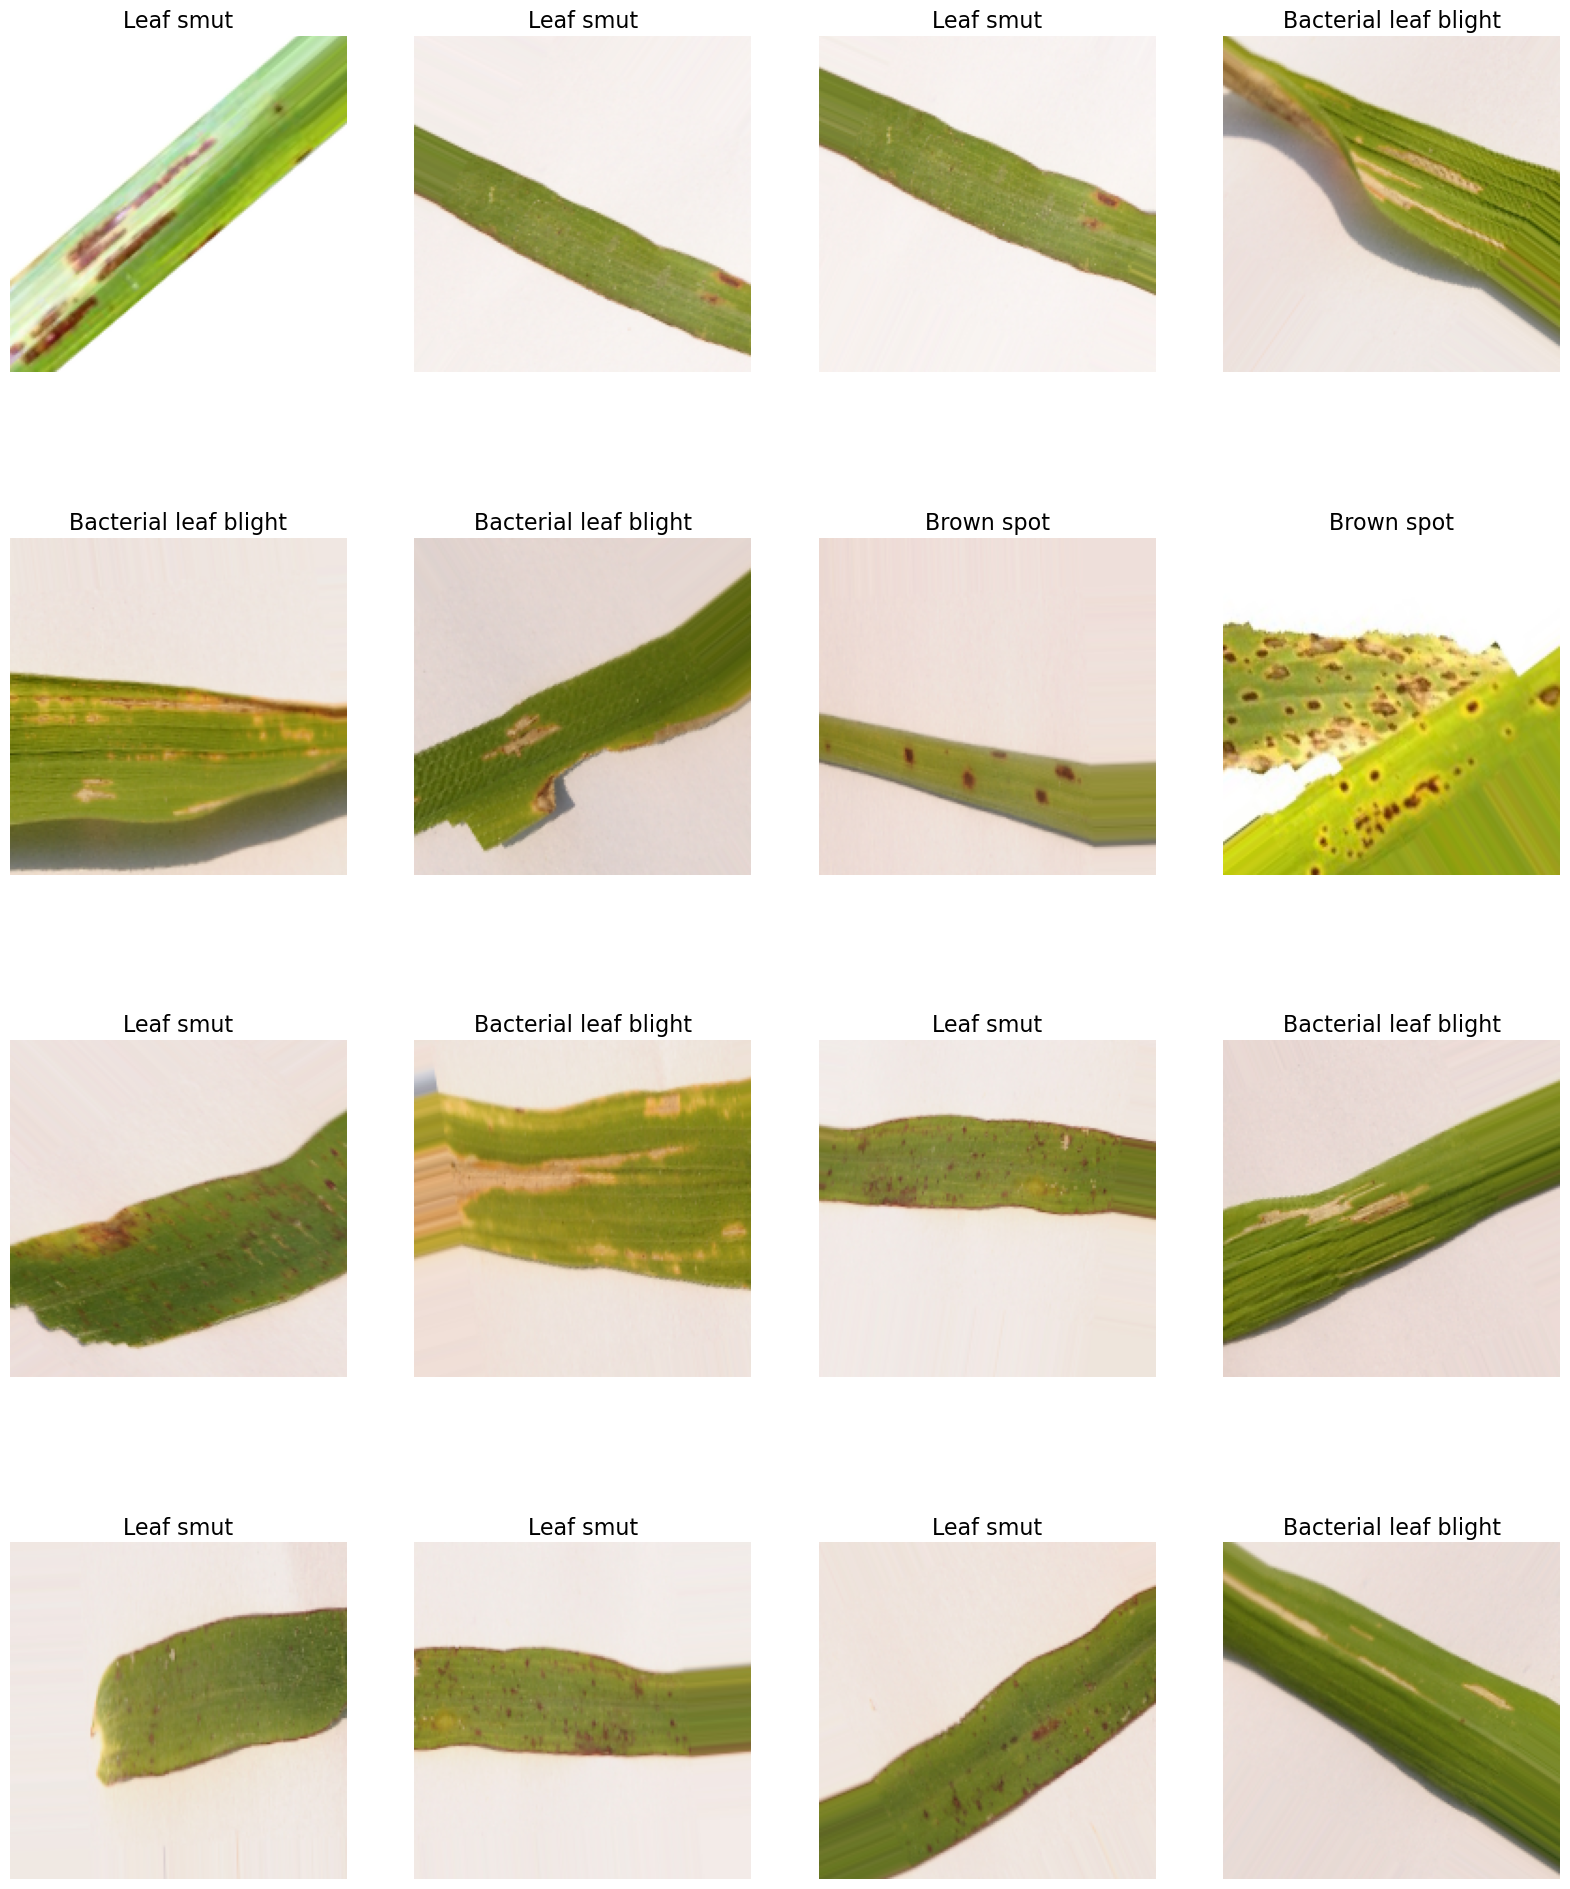

In [8]:
imgs, labels = next(train_generator)
plots(imgs, title = labels)

## CNN MODEL ARCHITECTURE

In [9]:
from keras.layers.core.activation import Activation
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(180,180,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation ='softmax'))

## SUMMARY OF MODEL

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

## COMPILE MODEL

In [11]:
from tensorflow.keras import optimizers
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Train Model

In [12]:
# Fitting the data
    
history = model.fit_generator(train_generator,
    epochs=30, # epochs used to how many itertion (1fp + loss + 1bp)
    validation_data = val_generator,
)

C:\Users\sunil\AppData\Local\Temp\ipykernel_10288\41701483.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
6/6 [==============================] - 18s 2s/step - loss: 1.1505 - accuracy: 0.3474 - val_loss: 1.1011 - val_accuracy: 0.3636
Epoch 2/30
6/6 [==============================] - 16s 2s/step - loss: 1.0938 - accuracy: 0.3474 - val_loss: 1.0907 - val_accuracy: 0.3636
Epoch 3/30
6/6 [==============================] - 19s 3s/step - loss: 1.0720 - accuracy: 0.3368 - val_loss: 1.0851 - val_accuracy: 0.4545
Epoch 4/30
6/6 [==============================] - 14s 2s/step - loss: 1.1103 - accuracy: 0.2737 - val_loss: 1.1131 - val_accuracy: 0.3636
Epoch 5/30
6/6 [==============================] - 16s 3s/step - loss: 1.0374 - accuracy: 0.4316 - val_loss: 1.0790 - val_accuracy: 0.2727
Epoch 6/30
6/6 [==============================] - 22s 3s/step - loss: 1.0091 - accuracy: 0.3684 - val_loss: 1.0506 - val_accuracy: 0.5455
Epoch 7/30
6/6 [==============================] - 19s 3s/step - loss: 0.9892 - accuracy: 0.4842 - val_loss: 1.0618 - val_accuracy: 0.4545
Epoch 8/30
6/6 [==================

In [ ]:
AFTER TRAINING
Training accuracy - 78.95%
Validation accuracy - 54.5%

## MODEL SAVING

In [13]:
model.save("model.h5")

## PLOTTING THE TRAINING ACCURACY AND VALIDATION ACCURACY AND TRAINING LOSS AND VALIDATION LOSS

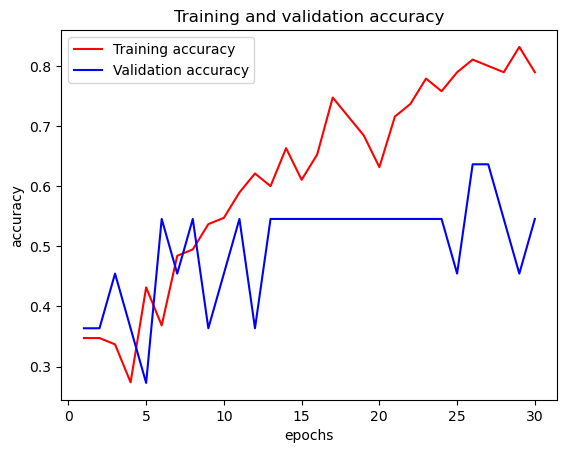

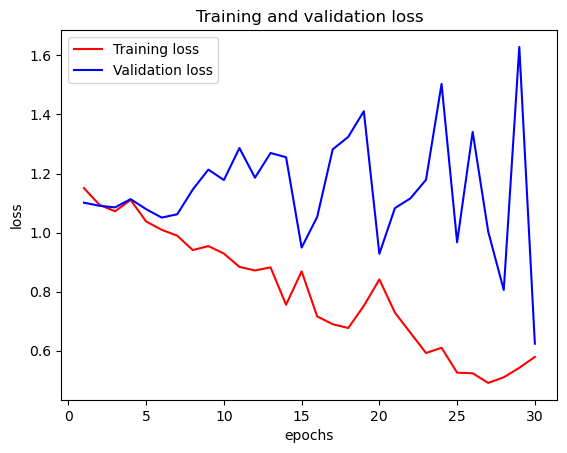

In [14]:
# Step:9 Plotting the training accuracy and validation accuracy
# Plotting the traning loss and validation loss
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


# CREATED MODEL SUMMARY

In [15]:
model = tf.keras.models.load_model("model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

In [16]:
test_datagen = ImageDataGenerator(rescale=(1./255))


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')

Found 13 images belonging to 3 classes.


In [17]:
model.evaluate(test_generator)

1/1 [==============================] - 1s 1s/step - loss: 0.7897 - accuracy: 0.6923


[0.789657711982727, 0.692307710647583]

### Here the loss is 0.78 and the accuracy of the model is 0.6923 percent means 69.23 %


# VISUALISE THE PREDICTION OF MODEL


1/1 [==============================] - 0s 78ms/step


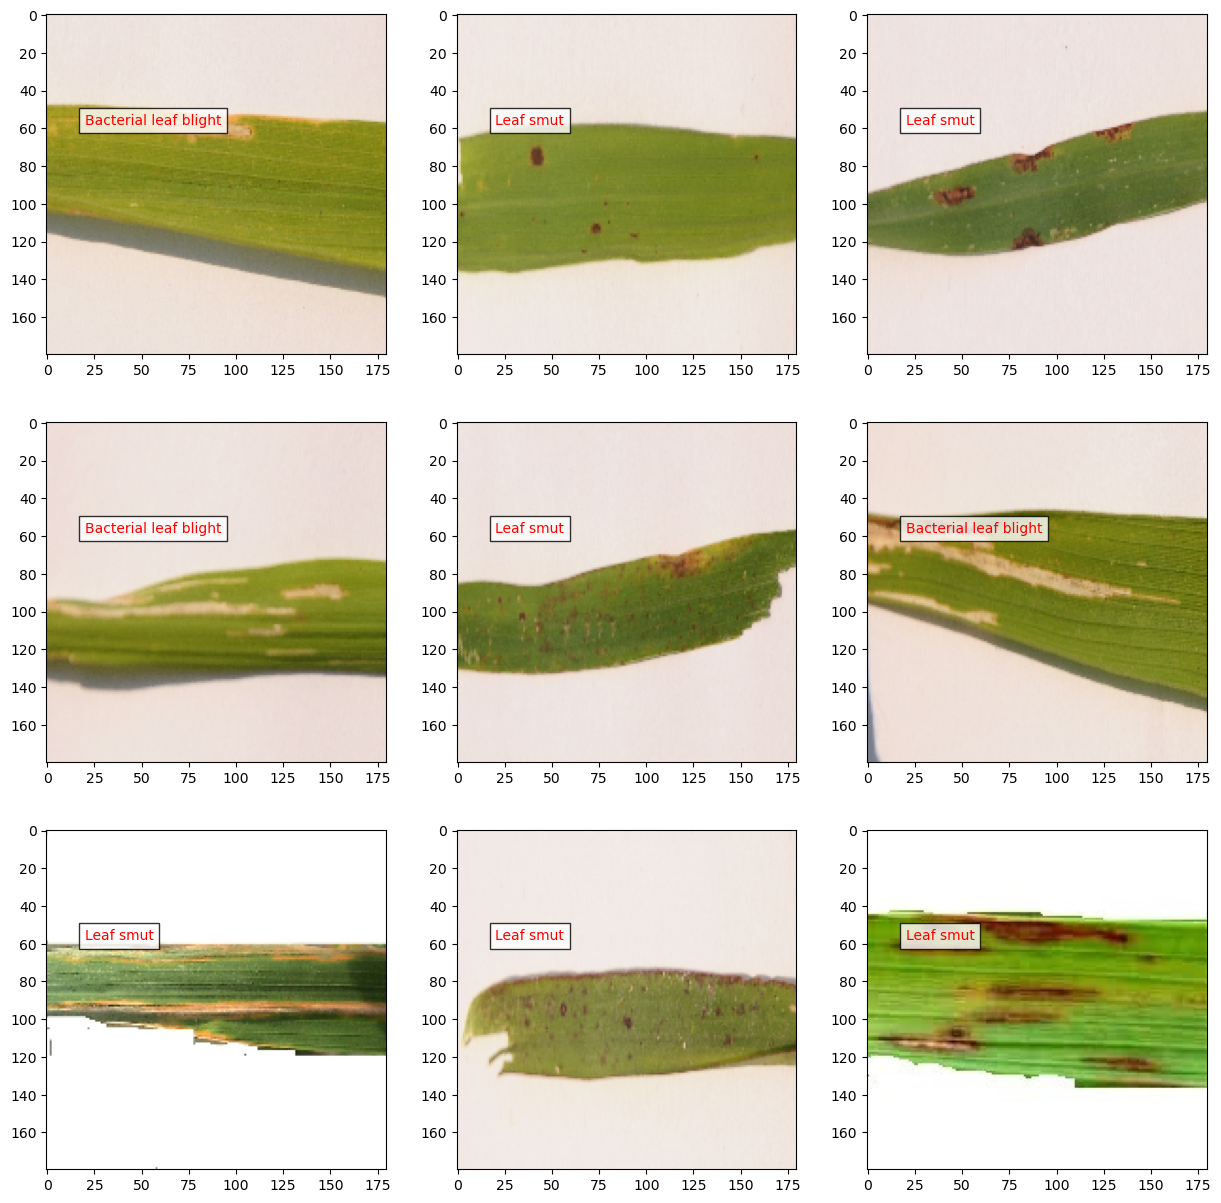

In [18]:
# Visualise the prediction of the model
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])

The Rice crop is considered one of the most widely grown crops in Asia and it is susceptible to various types of illnesses at different stages of production. 
Food safety and production can be affected by rice plant diseases, as well as a significant decline in the quality and quantity of agricultural goods. 
Plant diseases can potentially prevent grain harvesting entirely in severe circumstances. As a result, automation of identification and diagnosis of plant disease is widely needed in the agriculture field. Many approaches for doing this problem have been offered with deep learning rising as the preferred method because of its excellent achievement. In this proposed research, we used Hybrid deep CNN transfer learning with rice plant images or the classification and identification of various rice diseases, we employed Transfer Learning to generate our deep learning model using Rice_Leaf_ Dataset from a secondary source. The proposed model is 69.23% accurate, Experiments show that the proposed approach is viable, and it can be used to detect plant diseases efficiently and outperformed.